In [3]:
import pandas as pd


In [4]:
#df = pd.read_csv("data.csv", decimal = ',')
columns = pd.read_csv('cols.csv' , header = None)

In [5]:
columns = columns.values.tolist()


In [6]:
#map(lambda x:str(x), columns)

In [7]:
columns

[['nameoffederalstate'],
 ['Population_under_18years_2011'],
 ['Mean_Household_NetIncome'],
 ['RiskofPoverty'],
 ['AffluenceQuotient'],
 ['SocialWelfareRecepients_SGBII'],
 ['AllErz_Empf_SGBII_ALGII_aFmKu18_IV10'],
 ['avoidablemortalityICD_I10bI25_V06'],
 ['Socioeconomicstatus_of_children_enteringschool_SIK4'],
 ['Number_of_Hospitals_2011'],
 ['Masern_erste_Dosis'],
 ['Mumps_erste_Dosis'],
 ['Roeteln_erste_Dosis']]

In [8]:
import itertools
columns = list(itertools.chain.from_iterable(columns))

In [9]:
df = pd.read_csv("data.csv", usecols=columns, decimal=",")
df = df.set_index('nameoffederalstate')
df

,Population_under_18years_2011,Mean_Household_NetIncome,RiskofPoverty,AffluenceQuotient,SocialWelfareRecepients_SGBII,AllErz_Empf_SGBII_ALGII_aFmKu18_IV10,avoidablemortalityICD_I10bI25_V06,Socioeconomicstatus_of_children_enteringschool_SIK4,Number_of_Hospitals_2011,Masern_erste_Dosis,Mumps_erste_Dosis,Roeteln_erste_Dosis
nameoffederalstate,,,,,,,,,,,,
Schleswig-Holstein,16.88,1934.69,13.8,8.2,1.63,7.95,34.0,48.7,94,96.2,96.0,95.9
Hamburg,15.30,2361.00,14.7,12.2,1.46,11.14,27.8,49.8,47,95.9,95.4,95.2
Niedersachsen,17.15,2046.00,15.7,7.1,1.45,6.25,37.5,47.2,197,96.6,96.4,96.3
Bremen,15.09,1600.00,22.3,7.3,1.42,15.13,35.6,46.3,14,96.4,96.2,96.1
NRW,16.84,1850.00,16.6,8.0,1.38,8.26,28.8,48.1,401,97.6,97.4,97.3
Hessen,16.56,2138.00,12.7,10.6,1.20,6.55,32.2,48.3,174,97.0,97.0,97.0
RheinlandPfalz,16.47,2300.00,15.1,8.9,1.38,5.63,36.2,47.8,95,97.3,97.2,97.2
Baden-Württemberg,17.17,2280.28,11.2,10.1,1.10,4.36,29.1,51.4,285,94.1,93.5,93.6
Bayern,16.78,1850.00,11.3,10.2,1.22,3.96,33.4,49.3,370,94.6,94.2,94.0


In [10]:
df.index

Index(['Schleswig-Holstein', 'Hamburg', 'Niedersachsen', 'Bremen', 'NRW',
       'Hessen', 'RheinlandPfalz', 'Baden-Württemberg', 'Bayern', 'Saarland',
       'Berlin', 'Brandenburg', 'Mecklenburg-Vorpommern', 'Sachsen',
       'SachsenAnhalt', 'Thüringen'],
      dtype='object', name='nameoffederalstate')

In [11]:
X = df.values


In [12]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [13]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.06666667  0.68181914 -0.75745464  0.85015168 -0.80234718 -0.81454034
  -0.83619211  0.64593049  0.73467894 -0.64556831 -0.60983518 -0.61746337]
 [ 0.68181914  1.06666667 -0.75922819  0.80605075 -0.68937747 -0.69575089
  -0.65442071  0.56529748  0.21384673 -0.39584752 -0.4101376  -0.40438692]
 [-0.75745464 -0.75922819  1.06666667 -0.74742604  0.68326281  0.96970526
   0.63521699 -0.62147553 -0.60782915  0.5128907   0.51417375  0.51128402]
 [ 0.85015168  0.80605075 -0.74742604  1.06666667 -0.82816885 -0.5854254
  -0.95619689  0.79289808  0.4870516  -0.74076555 -0.72150571 -0.73370915]
 [-0.80234718 -0.68937747  0.68326281 -0.82816885  1.06666667  0.62557115
   0.88022814 -0.4618094  -0.51827433  0.65548562  0.65806604  0.65147897]
 [-0.81454034 -0.69575089  0.96970526 -0.5854254   0.62557115  1.06666667
   0.49780233 -0.46780903 -0.69674418  0.38256956  0.37816681  0.37422662]
 [-0.83619211 -0.65442071  0.63521699 -0.95619689  0.88022814  0.49780233
   1.06666667 

In [14]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.06666667  0.68181914 -0.75745464  0.85015168 -0.80234718 -0.81454034
  -0.83619211  0.64593049  0.73467894 -0.64556831 -0.60983518 -0.61746337]
 [ 0.68181914  1.06666667 -0.75922819  0.80605075 -0.68937747 -0.69575089
  -0.65442071  0.56529748  0.21384673 -0.39584752 -0.4101376  -0.40438692]
 [-0.75745464 -0.75922819  1.06666667 -0.74742604  0.68326281  0.96970526
   0.63521699 -0.62147553 -0.60782915  0.5128907   0.51417375  0.51128402]
 [ 0.85015168  0.80605075 -0.74742604  1.06666667 -0.82816885 -0.5854254
  -0.95619689  0.79289808  0.4870516  -0.74076555 -0.72150571 -0.73370915]
 [-0.80234718 -0.68937747  0.68326281 -0.82816885  1.06666667  0.62557115
   0.88022814 -0.4618094  -0.51827433  0.65548562  0.65806604  0.65147897]
 [-0.81454034 -0.69575089  0.96970526 -0.5854254   0.62557115  1.06666667
   0.49780233 -0.46780903 -0.69674418  0.38256956  0.37816681  0.37422662]
 [-0.83619211 -0.65442071  0.63521699 -0.95619689  0.88022814  0.49780233
   1.06

In [15]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.31091227  0.20051763 -0.10225829  0.24090637  0.09729815  0.71164697
  -0.35229779  0.14155954  0.30738091 -0.12706103  0.14351226  0.05787166]
 [-0.25165961  0.30447358  0.50768812 -0.27575184  0.02202811  0.24862376
   0.59054108 -0.1006154   0.20559085  0.18396273 -0.10735639 -0.03715444]
 [ 0.28521994 -0.33607261  0.08014744  0.36844139  0.15070483  0.48864346
   0.35487025  0.06341474 -0.51786437  0.05388729 -0.03105274 -0.00646477]
 [-0.32274143  0.03424911  0.29331511  0.11937245  0.2535619  -0.06540742
  -0.29685056 -0.70346727 -0.35705371 -0.04690514  0.06407352  0.09502818]
 [ 0.29402878 -0.11189949 -0.19032283 -0.49019947  0.45738017  0.23282842
  -0.23853065 -0.15034439  0.08901782  0.48492639 -0.19417008  0.02866149]
 [ 0.25456845 -0.44743936  0.25978777  0.28388098  0.23454277 -0.09847233
   0.08208843 -0.23202932  0.65350184 -0.15751849  0.09528674  0.02598649]
 [ 0.31278911  0.01970908 -0.20320885 -0.41049424 -0.32383385  0.2944154
   0.12696576 -0.42

In [16]:
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.31091227  0.20051763 -0.10225829  0.24090637  0.09729815  0.71164697
  -0.35229779  0.14155954  0.30738091 -0.12706103  0.14351226  0.05787166]
 [-0.25165961  0.30447358  0.50768812 -0.27575184  0.02202811  0.24862376
   0.59054108 -0.1006154   0.20559085  0.18396273 -0.10735639 -0.03715444]
 [ 0.28521994 -0.33607261  0.08014744  0.36844139  0.15070483  0.48864346
   0.35487025  0.06341474 -0.51786437  0.05388729 -0.03105274 -0.00646477]
 [-0.32274143  0.03424911  0.29331511  0.11937245  0.2535619  -0.06540742
  -0.29685056 -0.70346727 -0.35705371 -0.04690514  0.06407352  0.09502818]
 [ 0.29402878 -0.11189949 -0.19032283 -0.49019947  0.45738017  0.23282842
  -0.23853065 -0.15034439  0.08901782  0.48492639 -0.19417008  0.02866149]
 [ 0.25456845 -0.44743936  0.25978777  0.28388098  0.23454277 -0.09847233
   0.08208843 -0.23202932  0.65350184 -0.15751849  0.09528674  0.02598649]
 [ 0.31278911  0.01970908 -0.20320885 -0.41049424 -0.32383385  0.2944154
   0.12696576 -0.42

In [17]:
cor_df = pd.DataFrame(cor_mat1)

In [18]:
cor_df_copy = cor_df
#cor_df_copy.to_csv('corr.csv', sep='\t')

# Select upper triangle of correlation matrix
upper = cor_df_copy.where(np.triu(np.ones(cor_df_copy.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_droop = [column for column in upper.columns if any(upper[column] > 0.80)]

In [19]:
cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.31091227  0.20051763 -0.10225829  0.24090637  0.09729815  0.71164697
  -0.35229779  0.14155954  0.30738091 -0.12706103  0.14351226  0.05787166]
 [-0.25165961  0.30447358  0.50768812 -0.27575184  0.02202811  0.24862376
   0.59054108 -0.1006154   0.20559085  0.18396273 -0.10735639 -0.03715444]
 [ 0.28521994 -0.33607261  0.08014744  0.36844139  0.15070483  0.48864346
   0.35487025  0.06341474 -0.51786437  0.05388729 -0.03105274 -0.00646477]
 [-0.32274143  0.03424911  0.29331511  0.11937245  0.2535619  -0.06540742
  -0.29685056 -0.70346727 -0.35705371 -0.04690514  0.06407352  0.09502818]
 [ 0.29402878 -0.11189949 -0.19032283 -0.49019947  0.45738017  0.23282842
  -0.23853065 -0.15034439  0.08901782  0.48492639 -0.19417008  0.02866149]
 [ 0.25456845 -0.44743936  0.25978777  0.28388098  0.23454277 -0.09847233
   0.08208843 -0.23202932  0.65350184 -0.15751849  0.09528674  0.02598649]
 [ 0.31278911  0.01970908 -0.20320885 -0.41049424 -0.32383385  0.2944154
   0.12696576 -0.42

In [20]:
u,s,v = np.linalg.svd(X_std.T)
u

array([[-0.31091227,  0.20051763, -0.10225829,  0.24090637,  0.09729815,
        -0.71164697,  0.35229779, -0.14155954,  0.12706103, -0.30738091,
         0.14351226,  0.05787166],
       [-0.25165961,  0.30447358,  0.50768812, -0.27575184,  0.02202811,
        -0.24862376, -0.59054108,  0.1006154 , -0.18396273, -0.20559085,
        -0.10735639, -0.03715444],
       [ 0.28521994, -0.33607261,  0.08014744,  0.36844139,  0.15070483,
        -0.48864346, -0.35487025, -0.06341474, -0.05388729,  0.51786437,
        -0.03105274, -0.00646477],
       [-0.32274143,  0.03424911,  0.29331511,  0.11937245,  0.2535619 ,
         0.06540742,  0.29685056,  0.70346727,  0.04690514,  0.35705371,
         0.06407352,  0.09502818],
       [ 0.29402878, -0.11189949, -0.19032283, -0.49019947,  0.45738017,
        -0.23282842,  0.23853065,  0.15034439, -0.48492639, -0.08901782,
        -0.19417008,  0.02866149],
       [ 0.25456845, -0.44743936,  0.25978777,  0.28388098,  0.23454277,
         0.09847233, -

In [21]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [22]:
#Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])


Eigenvalues in descending order:
7.886964166687637
1.6792990724456964
0.9199297228186797
0.6096592785756986
0.4366830466585536
0.19789358087833975
0.13273975090317255
0.09149040559173002
0.022943082554698176
0.021376909845834083
0.0009395692792653842
8.141376069357293e-05


In [23]:
import plotly 

plotly.tools.set_credentials_file(username='hduyu', api_key='6QPygR3pnnMOB8nmXztY')
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls

In [24]:

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = Bar(
        x=['PC %s' %str(i+1) for i in range(len(eig_vals))],
        y=var_exp,
        showlegend=False)

trace2 = Scatter(
        x=['PC %s' %str(i+1) for i in range(len(eig_vals))], 
        y=cum_var_exp,
        name='cumulative explained variance')

data = Data([trace1, trace2])

layout=Layout(
        yaxis=YAxis(title='Explained variance in percent'),
        title='Explained variance by different principal components')

fig = Figure(data=data, layout=layout)



/anaconda3/envs/virtual/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.


/anaconda3/envs/virtual/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:558: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis




In [25]:
py.iplot(fig)

/anaconda3/envs/virtual/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,1.438553,-0.054316
1,2.518839,0.778435
2,1.036990,-0.970208
3,-1.202242,1.764578
4,0.983470,-1.412175
5,1.789585,-1.668654
6,0.897013,-1.857495
7,5.488987,0.966632
8,4.194181,0.585799
9,-0.550569,-1.529631


In [27]:
#principal_regions = pd.concat([principalDf, df[['target']]], axis = 1)
principal_regions = principalDf.set_index(df.index)

In [28]:

principal_regions['nameoffederalstate'] = principal_regions.index
principal_regions

#The results of a PCA are usually discussed in terms of component scores,
#sometimes called factor scores (the transformed variable values corresponding to a particular data point),
#and loadings (the weight by which each standardized original variable should be multiplied to get the component score)

,principal component 1,principal component 2,nameoffederalstate
nameoffederalstate,,,
Schleswig-Holstein,1.438553,-0.054316,Schleswig-Holstein
Hamburg,2.518839,0.778435,Hamburg
Niedersachsen,1.036990,-0.970208,Niedersachsen
Bremen,-1.202242,1.764578,Bremen
NRW,0.983470,-1.412175,NRW
Hessen,1.789585,-1.668654,Hessen
RheinlandPfalz,0.897013,-1.857495,RheinlandPfalz
Baden-Württemberg,5.488987,0.966632,Baden-Württemberg
Bayern,4.194181,0.585799,Bayern


In [29]:
loadings=pca.components_.T* np.sqrt(pca.explained_variance_)
loadings

array([[ 0.90179362, -0.26836813],
       [ 0.7299327 , -0.40750036],
       [-0.82727363,  0.44979177],
       [ 0.9361038 , -0.04583821],
       [-0.85282345,  0.14976367],
       [-0.73836973,  0.59884244],
       [-0.90723735, -0.02637817],
       [ 0.85129452,  0.28999012],
       [ 0.6731451 , -0.18333263],
       [-0.86592504, -0.52667577],
       [-0.86051104, -0.53422007],
       [-0.86159555, -0.53529409]])

In [30]:
loadingsdf=pd.DataFrame(data=loadings,index=columns[1:],columns=["PC1_Loadings","PC2_Loadings"])
loadingsdf

,PC1_Loadings,PC2_Loadings
Population_under_18years_2011,0.901794,-0.268368
Mean_Household_NetIncome,0.729933,-0.407500
RiskofPoverty,-0.827274,0.449792
AffluenceQuotient,0.936104,-0.045838
SocialWelfareRecepients_SGBII,-0.852823,0.149764
AllErz_Empf_SGBII_ALGII_aFmKu18_IV10,-0.738370,0.598842
avoidablemortalityICD_I10bI25_V06,-0.907237,-0.026378
Socioeconomicstatus_of_children_enteringschool_SIK4,0.851295,0.289990
Number_of_Hospitals_2011,0.673145,-0.183333
Masern_erste_Dosis,-0.865925,-0.526676


In [31]:
import matplotlib.pyplot as plt
fig1 = plt.figure(figsize = (8,8))
ax = fig1.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = principal_regions["nameoffederalstate"]
colors = ['r', 'g', 'b','c','m','y','k','darkorange','brown','indigo','deeppink','crimson','aqua','slategrey','olive','lightcoral']
for target, color in zip(targets,colors):
    indicesToKeep = principal_regions['nameoffederalstate'] == target
    ax.scatter(principal_regions.loc[indicesToKeep, 'principal component 1']
               , principal_regions.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 250)
ax.legend(targets,bbox_to_anchor=(1,1))
ax.grid()

In [32]:
import plotly.figure_factory as ff
names = principal_regions["nameoffederalstate"]
fig2 = ff.create_dendrogram(principalDf, orientation='bottom', labels=names)
fig2['layout'].update({'width':800, 'height':800},title="Dendrogram")
py.iplot(fig2, filename='dendrogram_with_labels')


/anaconda3/envs/virtual/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



Text(0.5, 1.0, 'Elbow Curve')

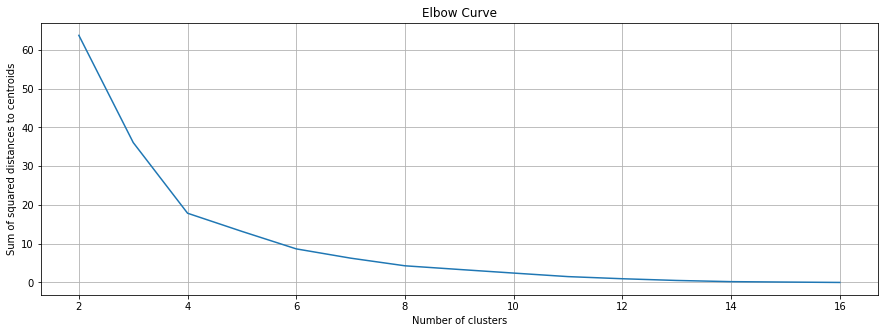

In [33]:
distorsions = []
for k in range(2, 17):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(principalDf)
    distorsions.append(kmeans.inertia_)

fig3 = plt.figure(figsize=(15, 5))
plt.plot(range(2, 17), distorsions)
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances to centroids')
plt.title('Elbow Curve')

In [34]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5).fit(principalDf)
kmeans.labels_

array([1, 1, 4, 0, 4, 4, 4, 2, 2, 4, 0, 3, 3, 3, 3, 3], dtype=int32)

In [35]:
principalDf_clusters=principalDf
principalDf_clusters["clusters"]=kmeans.labels_.T


In [36]:
principalDf_clusters.set_index(df.index)

,principal component 1,principal component 2,clusters
nameoffederalstate,,,
Schleswig-Holstein,1.438553,-0.054316,1
Hamburg,2.518839,0.778435,1
Niedersachsen,1.036990,-0.970208,4
Bremen,-1.202242,1.764578,0
NRW,0.983470,-1.412175,4
Hessen,1.789585,-1.668654,4
RheinlandPfalz,0.897013,-1.857495,4
Baden-Württemberg,5.488987,0.966632,2
Bayern,4.194181,0.585799,2


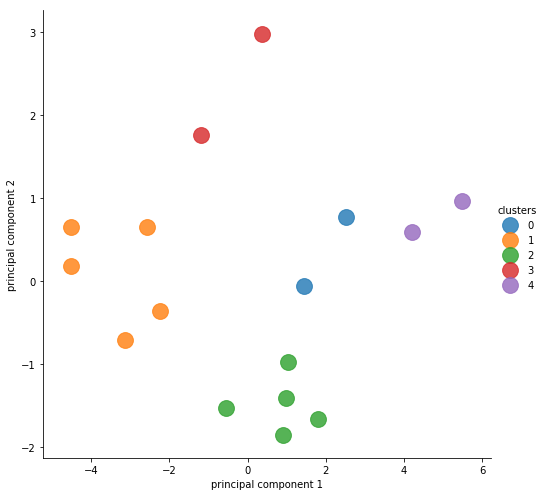

In [41]:
import seaborn as sns
facet = sns.lmplot(data=principalDf_clusters, x='principal component 1', y='principal component 2', hue='clusters', 
                   fit_reg=False, legend=True, legend_out=True,height=7,scatter_kws={"s":250})